# Part I - Ford GoBike System Data Exploration
#### by Joud Hijaz


## Table of Content
#### 1.  [**Introduction**](#intro)
#### 2.  [**Preliminary Wrangling**](#wrangle)
#### 2.1 [**Data Cleaning**](#clean)
#### 2.2 [**Feature Engineering**](#feng)
#### 3. [**Univariate Exploration**](#uni)
#### 3.1 [**Temporal Analysis**](#tem)
#### 3.1 [**Spatial Analysis**](#spa)
#### 4. [**Bivariate Exploration**](#bi)
#### 5. [**Multivariate Exploration**](#mul)
#### 6. [**Conclusions**](#con)

## Introduction
<a id='intro'> </a>

> The `Ford GoBike System` dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Data columns such as ride durations, start and end station names, station locations and the customer infomration are provided in the dataset.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(sns.set_style('dark'))
sns.set_palette('Paired')
%matplotlib inline
plt.style.use('ggplot')

In [18]:
%ls ./

201902-fordgobike-tripdata.csv  sample_data/


In [19]:
# read data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [20]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Preliminary Wrangling
<a id='wrangle'> </a>


### Data Cleaning
<a id='clean'> </a>

>- The data set is small, so I cleaned on the original data table.
>- The data contains one month rides from 2019-02-01 to 2019-02-28, with total 183,413 rows.
>- There are 329 unique stations and 4,646 unique bikes.
>- 90% of the users are subscribers, the rest are customers.
>- 70% of the users are males, 20% are females, and there are 10% for others.
>- The average duration for the rides are 12mins.
>- The youngest user is born in 2001, while the oldest in 1878.


In [22]:
# change start and end time from string to datetime object
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [23]:
print('The Earliest Date', df['start_time'].min())
print('The Latest Date: ', df['start_time'].max())

The Earliest Date 2019-02-01 00:00:20.636000
The Latest Date:  2019-02-28 23:59:18.548000


In [24]:
# change ids from integer/float to string type
df['start_station_id'] = df['start_station_id'].astype('string')
df['end_station_id'] = df['end_station_id'].astype('string')
df['bike_id'] = df['bike_id'].astype('string')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  string        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  string        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  string        
 12  user_type       

In [26]:
print('No. of Unique Start Stations:', df.start_station_id.nunique())
print('No. of Unique End Stations:', df.end_station_id.nunique())
print('No. of Unique Bikes:', df.bike_id.nunique())

No. of Unique Start Stations: 329
No. of Unique End Stations: 329
No. of Unique Bikes: 4646


In [27]:
# check for duplications
sum(df.duplicated())

0

In [28]:
# user info
print(df.user_type.value_counts())
print(df.member_gender.value_counts())
print(df.bike_share_for_all_trip.value_counts())

user_type
Subscriber    163544
Customer       19868
Name: count, dtype: int64
member_gender
Male      130651
Female     40844
Other       3652
Name: count, dtype: int64
bike_share_for_all_trip
No     166053
Yes     17359
Name: count, dtype: int64


In [29]:
# numeric values description
df[['duration_sec', 'member_birth_year']].describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


### Feature Engineering
<a id='feng'> </a>

> For a clear exploratory and explanatory analysis, I created features based on the current variables.
>1. `dow`: day of the week for start date
>1. `hour`: hour of the start date
>1. `duration_min`: duration by minutes
>1. `distance`: the direct distance based on start and end longitude, latitude
>1. `member_age`: rider age of the riding based on their dob and ride start date

In [30]:
# add dow
df['dow'] = df['start_time'].dt.day_name()

In [31]:
# add moy
df['hour'] = df['start_time'].dt.hour

In [32]:
# add duration_min
df['duration_min'] = round(df['duration_sec']/60,2)

In [33]:
# add distance
# reference: https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return round(km,2)

df['distance'] = haversine_vectorize(df['start_station_longitude'],
                                     df['start_station_latitude'],
                                     df['end_station_longitude'],
                                     df['end_station_latitude'])

In [34]:
# df.head()

In [35]:
# add member_age
df['member_age'] = df['start_time'].dt.year - df['member_birth_year']

In [36]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,17,869.75,0.54,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,Thursday,18,708.68,1.74,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,12,1030.90,2.70,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,17,608.17,0.26,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,23,26.42,2.41,45.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  string        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  string        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  string        
 12  user_type       

In [38]:
# save cleaned df to a file
df.to_csv('fordgobike_clean.csv', index=False)

### What is the structure of your dataset?

> There are 183,412 rides in the dataset with 21 features.
>- duration_sec
>- start_time
>- end_time
>- start_station_id
>- start_station_name
>- start_station_latitude
>- start_station_longitude
>- end_station_id
>- end_station_name
>- end_station_latitude
>- end_station_longitude
>- bike_id
>- user_type
>- member_birth_year
>- member_gender
>- bike_share_for_all_trip
>- dow
>- hour
>- duration_min
>- distance
>- member_age


### What is/are the main feature(s) of interest in your dataset?

>I'm most interested in the spatial and temporal features of the rides to understand the riding habit of people in San Francisco Bay area.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I expect time, duration, distance and location information will be the most important in the investigation.

## Univariate Exploration
<a id='uni'> </a>

### Temporal Analysis
<a id='tem'> </a>

#### Question #1. which day of the week has the most rides?

In [39]:
df['dow'].value_counts()

,count
dow,
Thursday,35197
Tuesday,31813
Wednesday,29641
Friday,28981
Monday,26852
Sunday,15523
Saturday,15405


#### Visualization #1. day of the week bar plot

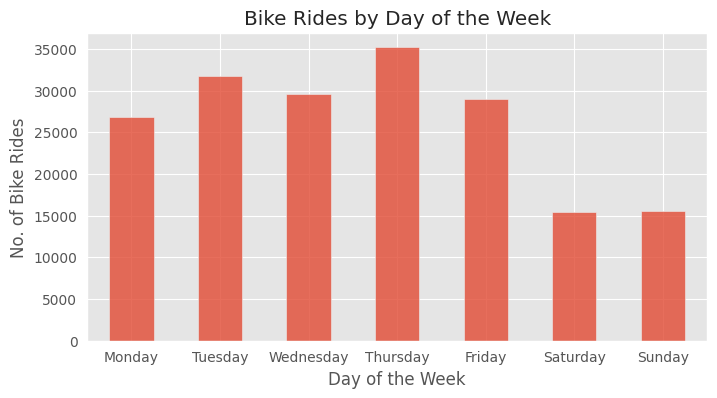

In [40]:
# barplot for dow
# order day of the week
ordinal_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_cnt = df['dow'].value_counts().reindex(ordinal_week)

plt.figure(figsize=(8,4))

dow_cnt.plot(kind='bar', alpha=0.8)
plt.title('Bike Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No. of Bike Rides')
plt.xticks(rotation=360);

#### Observation #1.  
> There are more rides during weekdays, especially on Thursday, the No. of rides reaches 35k in total. I guess in San Francsisco Bay area, people use shared bikes for work quite often, while during weekends, the No. of rides clearly decreased.

#### Question #2. which hour of the day is the most busy hour for bike riding?

In [41]:
df['hour'].value_counts().sort_index()

,count
hour,
0,925
1,548
2,381
3,174
4,235
5,896
6,3485
7,10614
8,21056


#### Visualization #2. hour of the day bar plot

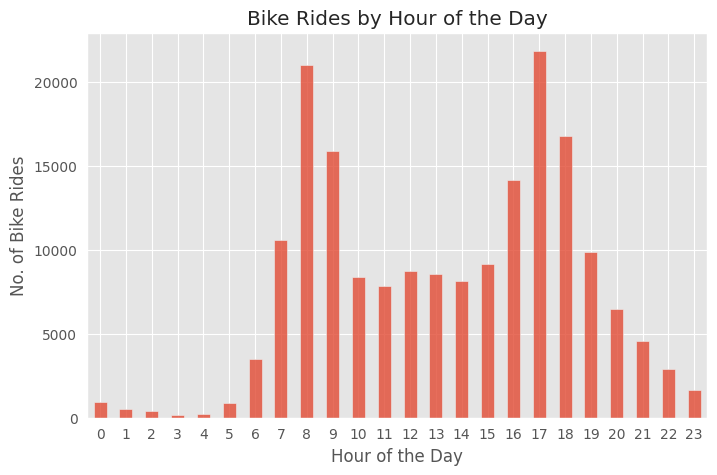

In [42]:
#barplot for hour of the day
hour_cnt = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8,5))

hour_cnt.plot(kind='bar', alpha=0.8)
plt.title('Bike Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Bike Rides')
plt.xticks(rotation=360);

#### Observation #2.  
> The second visualization supports my assumption that people use bikes mainly for commuting to work. The peak hours are during morning office time 7am to 9am, and after work time 4pm to 6pm, at 8am and 5pm the numbers reach the highest points. Between 10am to 3pm, the no. of bike rides are very steady, and after 6pm, the number decreased hour by hour till midnight.

#### Question #3. how long dose people ride?

In [43]:
df['duration_min'].describe()

,duration_min
count,183412.000000
mean,12.101301
std,29.906501
min,1.020000
25%,5.420000
50%,8.570000
75%,13.270000
max,1424.070000


#### Visualization #3.  ride durations (mins) histogram

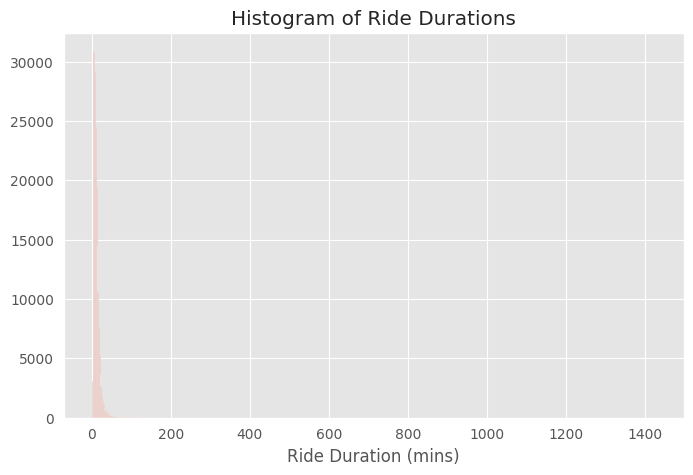

In [44]:
#set bins
binsize = 2
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlabel('Ride Duration (mins)')
plt.title('Histogram of Ride Durations')
plt.show()

In [45]:
np.log10(df['duration_min'].min())

0.008600171761917567

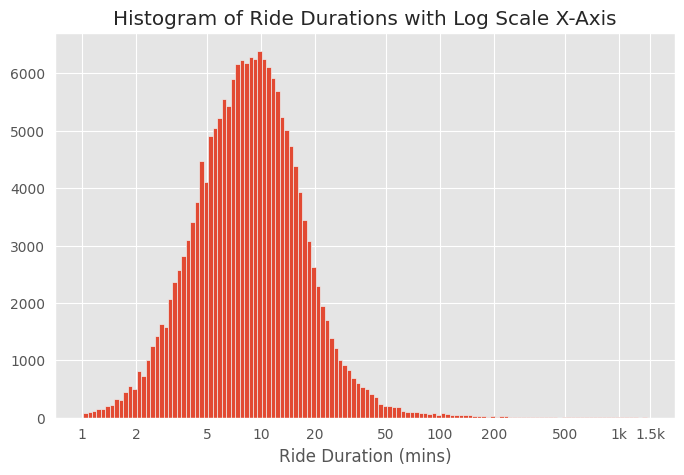

In [46]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.025
bins = 10 ** np.arange(0.005, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.title('Histogram of Ride Durations with Log Scale X-Axis')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 1500], [1, 2, 5, 10, 20, 50, 100, 200, 500, '1k', '1.5k'])
plt.xlabel('Ride Duration (mins)')
plt.show()

In [47]:
df.loc[df['duration_min']>=1400]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age
85465,84548,2019-02-16 15:48:25.029,2019-02-17 15:17:33.080,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,6301,Subscriber,1981.0,Male,No,Saturday,15,1409.13,1.3,38.0
101361,85444,2019-02-13 17:59:55.124,2019-02-14 17:43:59.954,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,...,6168,Subscriber,NaN,NaN,No,Wednesday,17,1424.07,2.4,NaN


In [48]:
df.loc[df['duration_min']>=1000].head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,12,1030.90,2.70,47.0
3401,62452,2019-02-28 00:04:01.344,2019-02-28 17:24:54.137,154.0,Doyle St at 59th St,37.841924,-122.288045,213.0,32nd St at Adeline St,37.823847,...,4683,Subscriber,1989.0,Female,No,Thursday,0,1040.87,2.10,30.0
5203,83195,2019-02-27 14:47:23.181,2019-02-28 13:53:58.433,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,...,5781,Subscriber,1962.0,Female,Yes,Wednesday,14,1386.58,1.56,57.0
7268,66065,2019-02-27 15:00:20.639,2019-02-28 09:21:26.336,349.0,Howard St at Mary St,37.781010,-122.405666,62.0,Victoria Manalo Draves Park,37.777791,...,6107,Customer,1994.0,Male,No,Wednesday,15,1101.08,0.36,25.0
8631,81549,2019-02-27 09:41:38.552,2019-02-28 08:20:48.386,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,...,2266,Subscriber,1963.0,Female,No,Wednesday,9,1359.15,0.40,56.0
14381,70211,2019-02-26 17:08:16.897,2019-02-27 12:38:28.436,80.0,Townsend St at 5th St,37.775235,-122.397437,58.0,Market St at 10th St,37.776619,...,5373,Subscriber,1990.0,Male,No,Tuesday,17,1170.18,1.76,29.0
29922,70925,2019-02-24 07:08:31.270,2019-02-25 02:50:36.590,375.0,Grove St at Masonic Ave,37.774836,-122.446546,71.0,Broderick St at Oak St,37.773063,...,5282,Subscriber,1989.0,Other,No,Sunday,7,1182.08,0.68,30.0
31295,70050,2019-02-23 21:46:00.982,2019-02-24 17:13:31.412,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,19.0,Post St at Kearny St,37.788975,...,311,Customer,NaN,NaN,No,Saturday,21,1167.50,0.96,NaN
32098,69980,2019-02-23 19:52:25.335,2019-02-24 15:18:46.072,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,369.0,Hyde St at Post St,37.787349,...,2034,Customer,1993.0,Male,No,Saturday,19,1166.33,1.41,26.0
33431,69620,2019-02-23 16:33:41.580,2019-02-24 11:54:02.408,90.0,Townsend St at 7th St,37.771058,-122.402717,321.0,5th St at Folsom,37.780146,...,3656,Customer,1993.0,Male,No,Saturday,16,1160.33,1.01,26.0


#### Observation #3.
>The histogram for ride duration is a long-tailed distribution, after plotting the X axis on log scale, it is clear that the majority of the rides are within 50mins, however, there are some rides have long durations, such as 100mins, 500mins, and the highest reaches around 1500mins, that is 25h. The long duration mostly due to people keep the bike overnight.

### Spatial Analysis
<a id='spa'> </a>

#### Question #4. how far do people travel?

In [49]:
df['distance'].describe()

,distance
count,183412.000000
mean,1.689620
std,1.096911
min,0.000000
25%,0.910000
50%,1.430000
75%,2.220000
max,69.430000


In [50]:
df.loc[df['distance']==69.43]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,...,4780,Subscriber,1985.0,Female,No,Tuesday,14,115.75,69.43,34.0


In [51]:
# the maximum of 70km riding distance is an outlier
df.loc[df['distance']>=10]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age
19827,2229,2019-02-26 15:11:44.523,2019-02-26 15:48:54.373,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,2080,Subscriber,1989.0,Male,Yes,Tuesday,15,37.15,15.66,30.0
50859,3225,2019-02-21 17:51:18.986,2019-02-21 18:45:04.085,167.0,College Ave at Harwood Ave,37.848152,-122.252160,22.0,Howard St at Beale St,37.789756,...,4567,Subscriber,1988.0,Other,Yes,Thursday,17,53.75,14.09,31.0
84701,16022,2019-02-17 12:39:48.765,2019-02-17 17:06:51.472,163.0,Lake Merritt BART Station,37.797320,-122.265320,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5091,Customer,NaN,NaN,No,Sunday,12,267.03,12.32,NaN
85529,8957,2019-02-17 12:38:50.477,2019-02-17 15:08:08.352,163.0,Lake Merritt BART Station,37.797320,-122.265320,8.0,The Embarcadero at Vallejo St,37.799953,...,4874,Subscriber,1975.0,Male,Yes,Sunday,12,149.28,11.70,44.0
87602,4378,2019-02-17 00:27:13.613,2019-02-17 01:40:11.883,9.0,Broadway at Battery St,37.798572,-122.400869,193.0,Grand Ave at Santa Clara Ave,37.812744,...,1975,Customer,1993.0,Male,No,Sunday,0,72.97,13.58,26.0
89787,1800,2019-02-16 14:15:06.336,2019-02-16 14:45:06.488,201.0,10th St at Fallon St,37.797673,-122.262997,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,6396,Subscriber,1975.0,Male,Yes,Saturday,14,30.00,11.52,44.0
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,...,4780,Subscriber,1985.0,Female,No,Tuesday,14,115.75,69.43,34.0
121514,1792,2019-02-11 14:39:16.299,2019-02-11 15:09:09.130,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,223.0,16th St Mission BART Station 2,37.764765,...,855,Subscriber,1988.0,Male,No,Monday,14,29.87,12.40,31.0
138857,57059,2019-02-07 12:17:12.295,2019-02-08 04:08:11.319,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,47.0,4th St at Harrison St,37.780955,...,1357,Customer,NaN,NaN,No,Thursday,12,950.98,11.54,NaN
153112,2216,2019-02-06 13:05:00.691,2019-02-06 13:41:57.678,219.0,Marston Campbell Park,37.809824,-122.280192,134.0,Valencia St at 24th St,37.752428,...,3027,Subscriber,1989.0,Female,Yes,Wednesday,13,36.93,13.89,30.0


#### Visualization #4. ride distance histogram

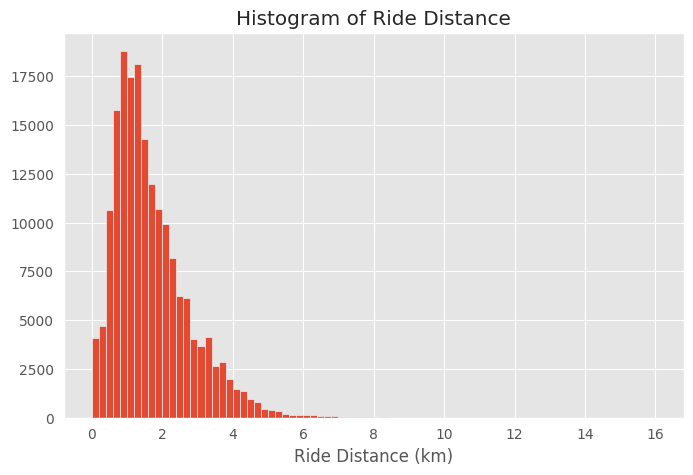

In [52]:
# set bins and remove the ourlier by setting the maximum bin edge to 16+binsize
binsize = 0.2
bins = np.arange(0, 16+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'distance', bins = bins)
plt.xlabel('Ride Distance (km)')
plt.title('Histogram of Ride Distance')
plt.show()

#### Observation #4.
> The histogram of ride distance is right skewed with most of the riding less than 8km. However, there are some rides with long distances, such as 10km and even 15km.

#### Questions #5. which is the busiest start/end station throught the month?

In [53]:
df['start_station_name'].value_counts().to_frame().head(10)

,count
start_station_name,
Market St at 10th St,3904
San Francisco Caltrain Station 2 (Townsend St at 4th St),3544
Berry St at 4th St,3052
Montgomery St BART Station (Market St at 2nd St),2895
Powell St BART Station (Market St at 4th St),2760
San Francisco Ferry Building (Harry Bridges Plaza),2710
San Francisco Caltrain (Townsend St at 4th St),2703
Powell St BART Station (Market St at 5th St),2327
Howard St at Beale St,2293


In [54]:
df['end_station_name'].value_counts().to_frame().head(10)

,count
end_station_name,
San Francisco Caltrain Station 2 (Townsend St at 4th St),4857
Market St at 10th St,3973
Montgomery St BART Station (Market St at 2nd St),3647
San Francisco Ferry Building (Harry Bridges Plaza),3368
Powell St BART Station (Market St at 4th St),2997
San Francisco Caltrain (Townsend St at 4th St),2947
Berry St at 4th St,2872
The Embarcadero at Sansome St,2512
Powell St BART Station (Market St at 5th St),2353


#### Visualization #5. bar plot for the busiest stations

In [55]:
start_st = df['start_station_name'].value_counts()
end_st = df['end_station_name'].value_counts()

In [56]:
start_order = start_st.index.to_list()[0:5]
end_order = end_st.index.to_list()[0:5]

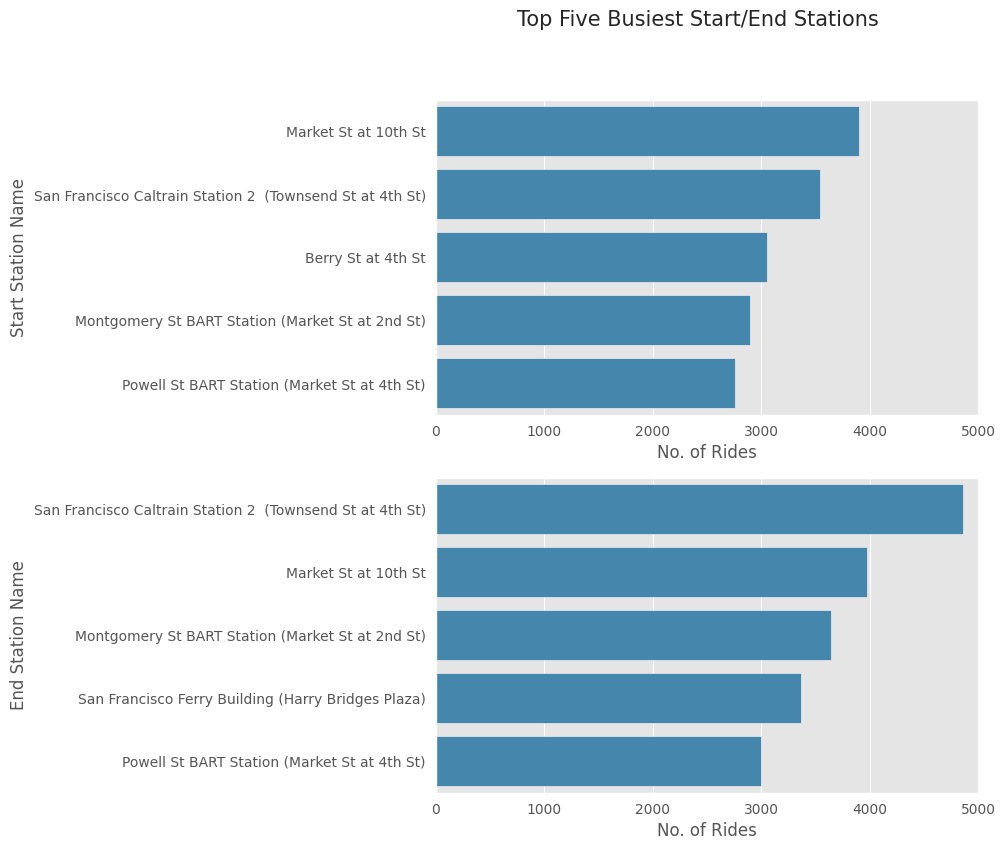

In [57]:
# countplot with seaborn
fig, ax = plt.subplots(nrows=2, figsize=(7, 9))
base_color = sns.color_palette()[1]
sns.countplot(y='start_station_name', data=df, order=start_order, color=base_color, ax=ax[0])
sns.countplot(y='end_station_name', data=df, order=end_order, color=base_color, ax=ax[1])
ax[0].set_xlabel('No. of Rides')
ax[1].set_xlabel('No. of Rides')
ax[0].set_ylabel('Start Station Name')
ax[1].set_ylabel('End Station Name')
ax[0].set_xlim((0, 5000))
ax[1].set_xlim((0, 5000))

fig.suptitle('Top Five Busiest Start/End Stations', fontsize=15);

#### Observation #5.
> `Market St at 10th St` and `San Francisco Caltrain Station 2` are two busiest stations for both start and end stations. During the whole month, there are around 5000 rides ended at San Francisco Caltrain Station 2. Besides there two stations, Montgomery St BART Station, Powell St BART Station, Berry St at 4th St and San Francisco Ferry Building are busy riding stations as well.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Both the riding duration and distance distributions are right skewed with a long tail.

> The duration variable is quite spread out, so I looked at the data using a log transform.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distance variable has an outlier that is way larger than normal, so I removed the outlier in the visualization.

## Bivariate Exploration
<a id='bi'> </a>

#### Question #6. what's the difference between customer and subscribers in terms of travel time?

In [58]:
df.groupby('user_type')['dow'].value_counts()

user_type   dow      
Customer    Thursday      3390
            Friday        3030
            Sunday        2896
            Monday        2741
            Saturday      2739
            Tuesday       2606
            Wednesday     2466
Subscriber  Thursday     31807
            Tuesday      29207
            Wednesday    27175
            Friday       25951
            Monday       24111
            Saturday     12666
            Sunday       12627
Name: count, dtype: int64

#### Visualization #6. day of the week bar plot by user type

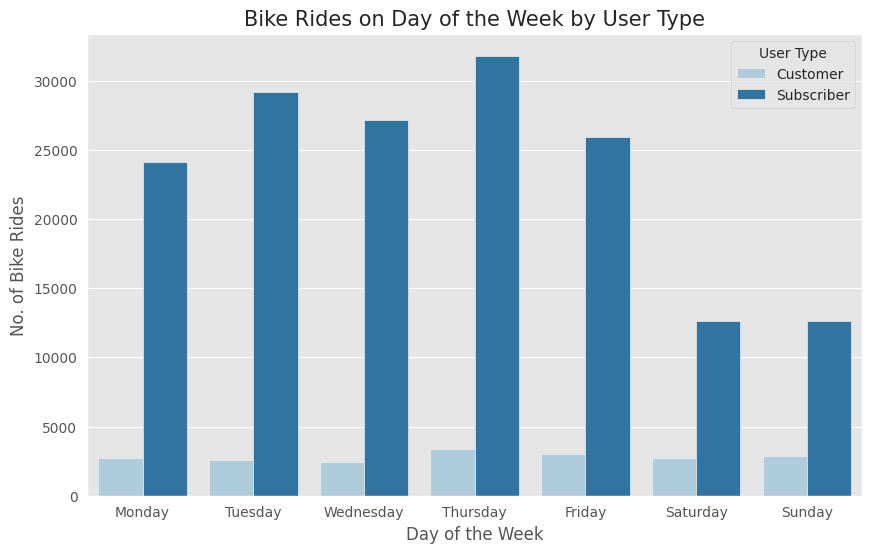

In [59]:
ordinal_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[10, 6])
sns.set_palette('Paired')
sns.countplot(data=df, x='dow', hue='user_type', order=ordinal_week)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('No. of Bike Rides', fontsize=12)
plt.title('Bike Rides on Day of the Week by User Type', fontsize=15)
plt.legend(title = 'User Type');

> It is a bit difficult to see the trend for customers due to the small total number of rides. I think two seperated plots will be better in this case.

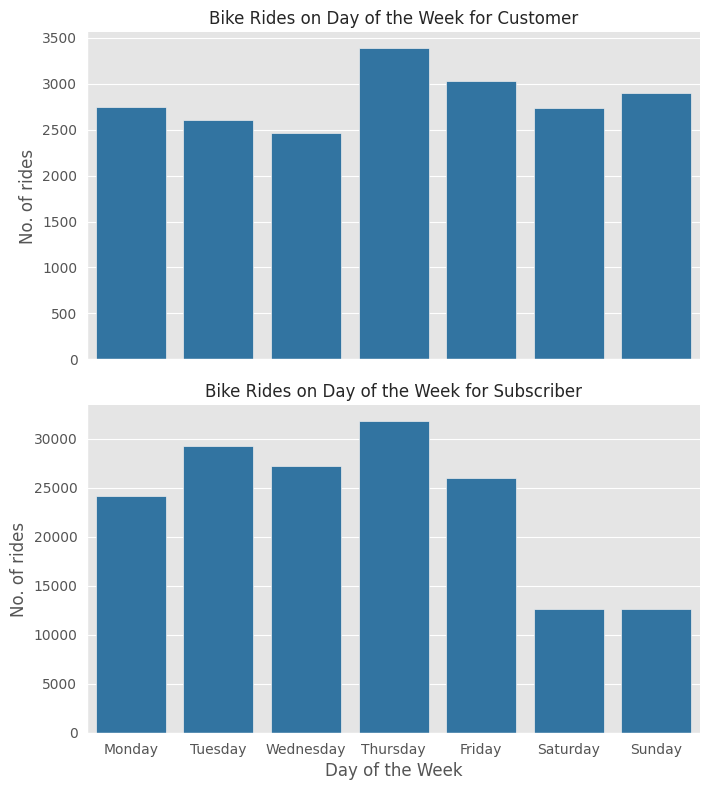

In [60]:
g = sns.FacetGrid(df, row='user_type', height=4, aspect=1.8, sharey=False)
base_color = sns.color_palette()[1]
g.map(sns.countplot, 'dow', order=ordinal_week, color=base_color)
g.set_titles('Bike Rides on Day of the Week for {row_name}')
g.set_axis_labels(x_var="Day of the Week", y_var="No. of rides")

#### Observation #6.
> Subscribers ride almost 10 times more than normal customers. The trend that more users ride bikes during workdays are quite clear for subscribers. However, the normal customers don't share the same trend. Users use shared bikes for commuting purpose are mostly bike subscribers.

#### Question #7. are there any difference in riding durations for male and female?

In [61]:
# df.info()

In [62]:
member_info = df[['user_type', 'duration_min', 'distance', 'member_gender', 'member_age']]

In [63]:
member_info.head()

,user_type,duration_min,distance,member_gender,member_age
0,Customer,869.75,0.54,Male,35.0
1,Customer,708.68,1.74,NaN,NaN
2,Customer,1030.90,2.70,Male,47.0
3,Subscriber,608.17,0.26,Other,30.0
4,Subscriber,26.42,2.41,Male,45.0


In [64]:
member_info.groupby('member_gender').agg({'duration_min':['size', np.mean]})

<ipython-input-64-990f0c72cddd>:1: FutureWarning: The provided callable <function mean at 0x7c7d3a532b60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  member_info.groupby('member_gender').agg({'duration_min':['size', np.mean]})


duration_min           
                      size       mean
member_gender                        
Female               40844  12.984508
Male                130651  11.210645
Other                 3652  16.608535

#### Visualization #7. violin plot and histogram of ride durations for different member genders

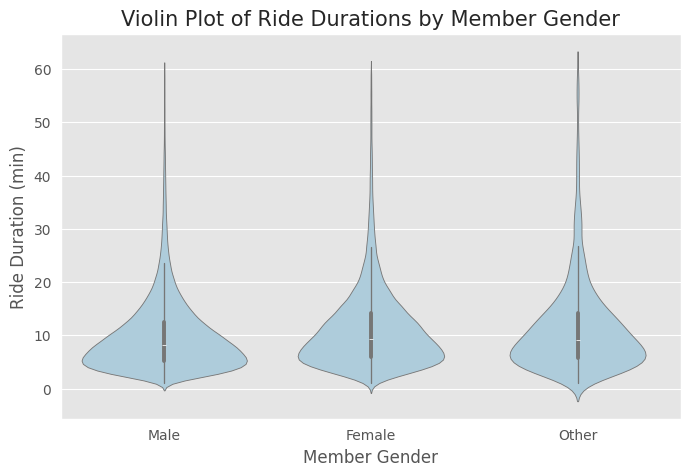

In [65]:
plt.figure(figsize=[8, 5])

base_color = sns.color_palette()[0]
sns.violinplot(data=member_info.loc[member_info['duration_min']<=60], x='member_gender',
               y='duration_min', color=base_color)
plt.xlabel('Member Gender', fontsize=12)
plt.ylabel('Ride Duration (min)', fontsize=12)
plt.title('Violin Plot of Ride Durations by Member Gender', fontsize=15);

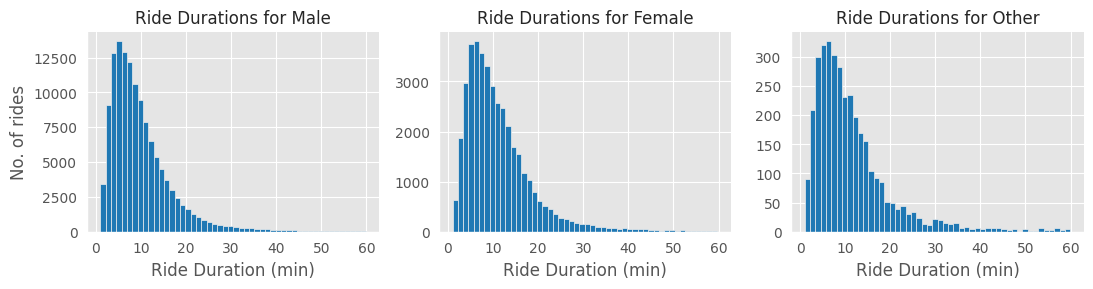

In [66]:
g = sns.FacetGrid(member_info.loc[member_info['duration_min']<=60],
                  col='member_gender', height=3, aspect=1.2, sharey=False, col_wrap=3)
base_color = sns.color_palette()[1]
g.map(plt.hist, 'duration_min', color=base_color, bins=50)
g.set_titles('Ride Durations for {col_name}')
g.set_axis_labels(x_var='Ride Duration (min)', y_var='No. of rides')

#### Observation #7.
> The duration distribution (consider only rides within 60mins) for diffirent genders are in similar shapes. Male riders have more rides within 10mins, and their average riding duration is around 8mins. While female riders also have most of the rides within 10mins, they have more rides in 10-20mins range compared with male riders, and their average riding duration is around 10mins.

> Male riders took much more rides compared with female riders.


#### Question #8. are there any difference in riding durations for members indifferent age groups?

In [67]:
member_info['member_age'].describe()

,member_age
count,175147.000000
mean,34.193563
std,10.116689
min,18.000000
25%,27.000000
50%,32.000000
75%,39.000000
max,141.000000


In [68]:
# there are some suspicious member age data
(df['member_age']>=90).sum()

77

In [69]:
# df.loc[df['member_birth_year']<=1920]

In [70]:
member_info.loc[member_info['member_age']<90].describe()

,duration_min,distance,member_age
count,175070.000000,175070.000000,175070.000000
mean,11.737280,1.688140,34.157011
std,27.365684,1.095992,9.966723
min,1.020000,0.000000,18.000000
25%,5.380000,0.910000,27.000000
50%,8.500000,1.430000,32.000000
75%,13.150000,2.220000,39.000000
max,1409.130000,69.430000,89.000000


In [71]:
# bin edges that will be used to define member age group
bin_edges = [18, 30, 60, 90]
# labels
bin_names = ['18-30', '31-60', '60+']
pd.options.mode.chained_assignment = None  # default='warn'
member_info['age_group'] = pd.cut(member_info['member_age'], bin_edges, labels=bin_names)
member_info.head()

,user_type,duration_min,distance,member_gender,member_age,age_group
0,Customer,869.75,0.54,Male,35.0,31-60
1,Customer,708.68,1.74,NaN,NaN,NaN
2,Customer,1030.90,2.70,Male,47.0,31-60
3,Subscriber,608.17,0.26,Other,30.0,18-30
4,Subscriber,26.42,2.41,Male,45.0,31-60


####  Visualization #8. violin plot and histogram of ride durations for different age groups

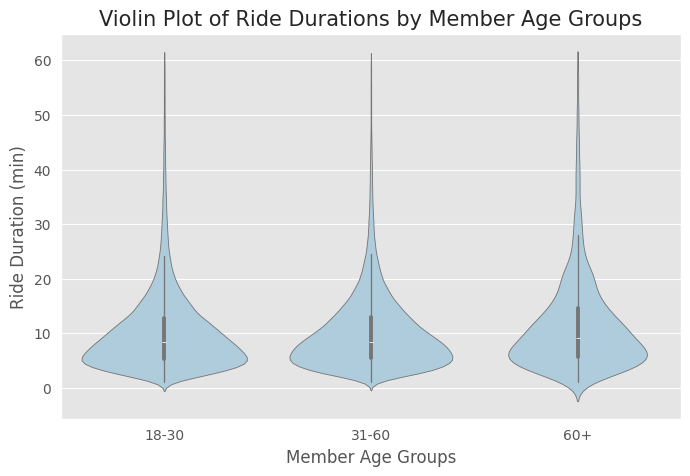

In [72]:
plt.figure(figsize=[8, 5])

base_color = sns.color_palette()[0]
sns.violinplot(data=member_info.loc[(member_info['member_age']<90) & (member_info['duration_min']<=60)],
               x='age_group',
               y='duration_min',
               color=base_color)
plt.xlabel('Member Age Groups', fontsize=12)
plt.ylabel('Ride Duration (min)', fontsize=12)
plt.title('Violin Plot of Ride Durations by Member Age Groups', fontsize=15);

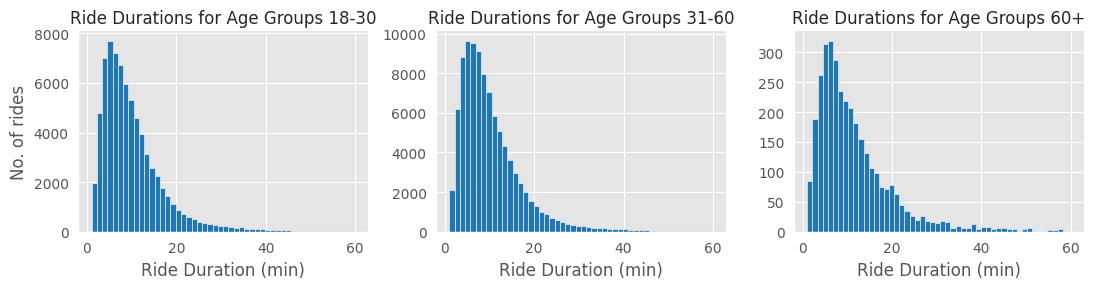

In [73]:
g = sns.FacetGrid(member_info.loc[(member_info['member_age']<90) & (member_info['duration_min']<=60)],
                  col='age_group', height=3, aspect=1.2, sharey=False, col_wrap=3)
base_color = sns.color_palette()[1]
g.map(plt.hist, 'duration_min', color=base_color, bins=50)
g.set_titles('Ride Durations for Age Groups {col_name}')
g.set_axis_labels(x_var='Ride Duration (min)', y_var='No. of rides')

#### Observation #8.
> All three age groups have an average ride duration of 10mins. Compared with 60+ riders, members in 18 to 60 age groups have more rides within 10mins.

> The most rides are taken by members in 31 to 60 age group, rides for the elders are less. The ride durations distribution for all age groups are very much the same, with one peak poin at around 10mins, and then gradualy decreased with a long tail.

#### Question #9. what's the difference between customer and subscriber in terms of riding distance?

In [74]:
df.groupby('user_type')['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,19868.0,1.866098,1.169476,0.0,1.04,1.68,2.53,13.58
Subscriber,163544.0,1.668180,1.085817,0.0,0.90,1.41,2.18,69.43


In [75]:
df.loc[(df.user_type=='Customer') & (df.distance==0)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age
19,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,180.0,Telegraph Ave at 23rd St,37.812678,...,5629,Customer,1978.0,Male,No,Thursday,23,14.57,0.0,41.0
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,...,319,Customer,NaN,NaN,No,Thursday,22,56.97,0.0,NaN
1197,3200,2019-02-28 18:46:44.597,2019-02-28 19:40:04.775,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,...,1271,Customer,1996.0,Female,No,Thursday,18,53.33,0.0,23.0
1198,3175,2019-02-28 18:47:04.953,2019-02-28 19:40:00.440,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,...,3598,Customer,1996.0,Female,No,Thursday,18,52.92,0.0,23.0
1541,4222,2019-02-28 17:56:48.285,2019-02-28 19:07:10.497,381.0,20th St at Dolores St,37.758238,-122.426094,381.0,20th St at Dolores St,37.758238,...,5152,Customer,1993.0,Male,No,Thursday,17,70.37,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180366,1778,2019-02-01 10:56:08.587,2019-02-01 11:25:47.311,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,...,5269,Customer,1989.0,Female,No,Friday,10,29.63,0.0,30.0
180523,2121,2019-02-01 10:21:35.740,2019-02-01 10:56:57.049,200.0,2nd Ave at E 18th St,37.800214,-122.253810,200.0,2nd Ave at E 18th St,37.800214,...,4853,Customer,1986.0,Male,No,Friday,10,35.35,0.0,33.0
180709,901,2019-02-01 10:08:17.199,2019-02-01 10:23:18.421,370.0,Jones St at Post St,37.787327,-122.413278,370.0,Jones St at Post St,37.787327,...,1600,Customer,NaN,NaN,No,Friday,10,15.02,0.0,NaN
180710,878,2019-02-01 10:08:37.063,2019-02-01 10:23:15.278,370.0,Jones St at Post St,37.787327,-122.413278,370.0,Jones St at Post St,37.787327,...,1123,Customer,NaN,NaN,No,Friday,10,14.63,0.0,NaN


#### Visualization #9. histogram of ride distance for different user types

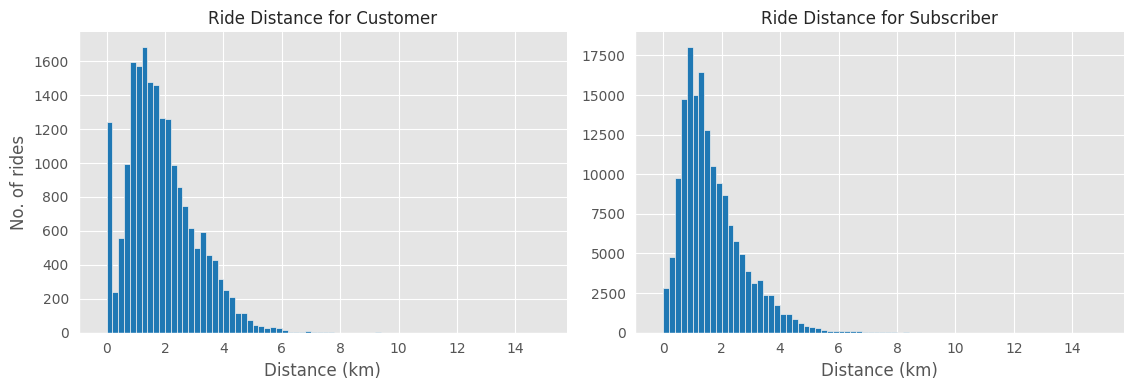

In [76]:
g = sns.FacetGrid(df.loc[df['distance']<=15], col='user_type', height=4, aspect=1.4, sharey=False, col_wrap=2)
base_color = sns.color_palette()[1]

binsize = 0.2
bins = np.arange(-0.2, 15+binsize, binsize)
g.map(plt.hist, 'distance', bins=bins, color=base_color)
g.set_titles('Ride Distance for {col_name}')
g.set_axis_labels(x_var='Distance (km)', y_var="No. of rides")

#### Observation #9.
> The ride distance for customers have two peaks. The first one is zero kilometer, meaning the users return bikes to the start stations of the trip. The second one is around 2km, which is also the peak point for subscriber users.

> For subscribers, not as many subscribers will return bikes to their start station, echoing with the fact that they use bikes maninly for commuting.

#### Question #10. what's the relation for distance and duration?

In [77]:
df[['duration_min','distance']].describe()

,duration_min,distance
count,183412.000000,183412.000000
mean,12.101301,1.689620
std,29.906501,1.096911
min,1.020000,0.000000
25%,5.420000,0.910000
50%,8.570000,1.430000
75%,13.270000,2.220000
max,1424.070000,69.430000


#### Visualization #10. plot of  ride distance and duration

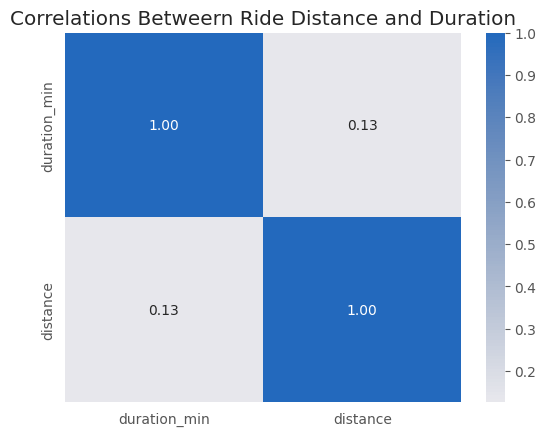

In [78]:
# the correlation heatmap
sns.heatmap(df[['duration_min','distance']].corr(),
            annot = True,
            fmt = '.2f',
            cmap = 'vlag_r',
            center = 0)
plt.title('Correlations Betweern Ride Distance and Duration');

> The correlation between distance and duration are positive but small (0.13), not suggesting a strong relation between the two variables.

Text(0.5, 1.0, '2D Histogram for Ride Duration and Distance')

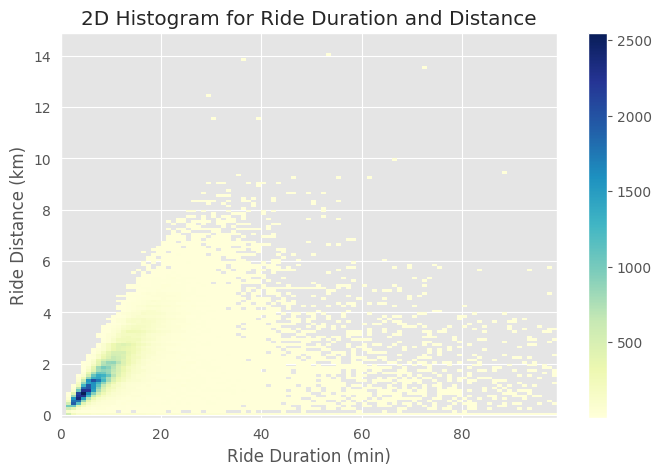

In [79]:
plt.figure(figsize=[8,5])

df_dd = df.query('distance < 15 and duration_min < 100')
bins_dur = np.arange(0, 100, 1)
bins_dis = np.arange(-0.1, 15, 0.1)
plt.hist2d(data = df_dd, x = 'duration_min', y = 'distance',
           bins = [bins_dur, bins_dis],
           cmap='YlGnBu', cmin = 0.3)
plt.colorbar();
plt.xlabel('Ride Duration (min)')
plt.ylabel('Ride Distance (km)')
plt.title('2D Histogram for Ride Duration and Distance')

> After I filtered out the outliers, from the 2D histogram it is clear that there is a strong relation for duration and distance when duration is within 20mins and distance is within 3km.

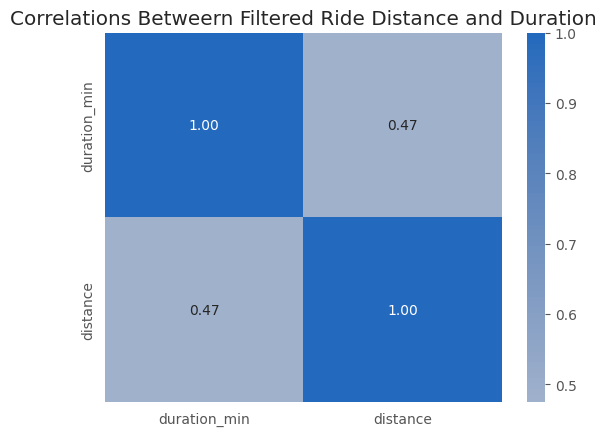

In [80]:
# the correlation heatmap for filtered duration and distance
sns.heatmap(df_dd[['duration_min','distance']].corr(),
            annot = True,
            fmt = '.2f',
            cmap = 'vlag_r',
            center = 0)
plt.title('Correlations Betweern Filtered Ride Distance and Duration');

> The correlation for distance and duration is 0.47 for durations less than 100mins and distance less than 15km, that is a stronger positive relation compared with that without filters.

#### Observation #10.
> The correlation for duration and distance is small if no filter is applied to the distribution. From the 2D histogram map, I noticed a strong positive linear relation between the two variables when their values are within 20mins and 3km respectively.

> After applying filters to limit maximum duration to 100mins and maximum distance to 15km, the correlation between these two variables increased from 0.13 to 0.47.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I noticed riding durations and distance have a strong positive relation when duration is within 20mins and distance is within 3km. When duration and distance increase, this relation is affected largely by outliers, so the correlation coefficient is decreased.

> The subscribers use shared bikes for commuting purpose, therefore there is a clear increasing of bike rides during weekdays, while the normal customers don't share the same time pattern.

> There is no huge differences of riding durations for users in different gender and age groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that there is a large portion of the rides completed by normal customers have the same start and end stations.

## Multivariate Exploration
<a id='mul'> </a>

#### Question #11. how do customers and cubsribers ride bikes throught the days and weeks?

In [81]:
df_temporal = df.groupby(['user_type', 'dow', 'hour'])['bike_id'].size().to_frame().reset_index()

In [82]:
ordinal_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_temporal['dow'] = pd.Categorical(df_temporal['dow'],
                                    categories=ordinal_week,
                                    ordered=True)

In [83]:
df_temporal.head()

,user_type,dow,hour,bike_id
0,Customer,Friday,0,15
1,Customer,Friday,1,7
2,Customer,Friday,2,9
3,Customer,Friday,3,2
4,Customer,Friday,4,2


#### Visualization #11. heatmap for rides during the day and weeks for customers and subscribers

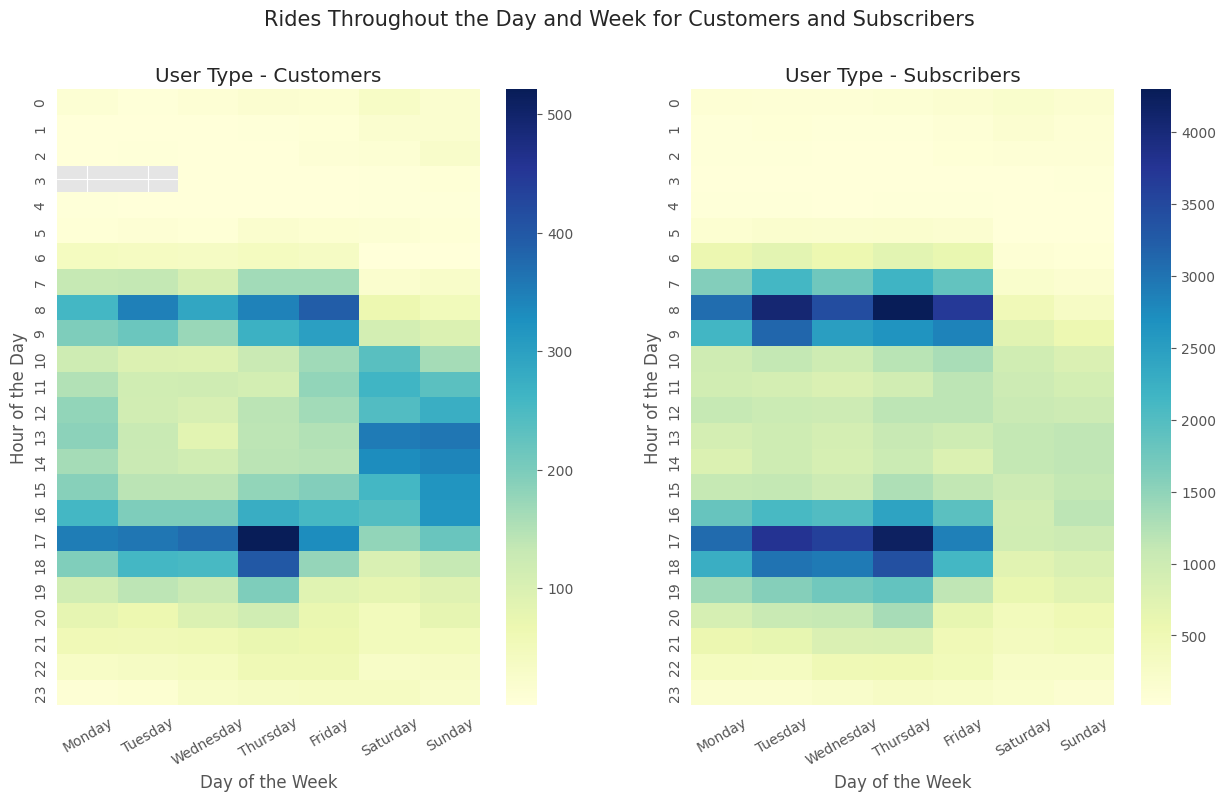

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating subplots for customer and subscriber ride heatmaps
fig, ax = plt.subplots(ncols=2, figsize=(15, 8))

# Heatmap for Customers
sns.heatmap(data=df_temporal.loc[df_temporal.user_type == 'Customer']
                     .pivot(index='hour', columns='dow', values='bike_id'),
            cmap='YlGnBu', ax=ax[0])

# Heatmap for Subscribers
sns.heatmap(data=df_temporal.loc[df_temporal.user_type == 'Subscriber']
                     .pivot(index='hour', columns='dow', values='bike_id'),
            cmap='YlGnBu', ax=ax[1])

# Labels and titles
ax[0].set_xlabel('Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[0].set_ylabel('Hour of the Day')
ax[1].set_ylabel('Hour of the Day')
ax[0].set_title('User Type - Customers')
ax[1].set_title('User Type - Subscribers')

# Rotate x-axis ticks
ax[0].tick_params(axis='x', rotation=30)
ax[1].tick_params(axis='x', rotation=30)

# Figure title
fig.suptitle('Rides Throughout the Day and Week for Customers and Subscribers', fontsize=15)

plt.show()


#### Observation #11.
> The subscribers mainly use bikes for commuting, there are few rides during off-peak hours on weekdays and the whole day during weekends.

>Normal customers use bikes for commuting purposes as well, more of the ride during off-peak hours on weekdays compared with subscribers, while during weekends, there are quite a lot of customers ride shared bikes.

#### Question #12. how's the riding distance and durations related for users in different user groups?

In [86]:
df_user = member_info.groupby(['member_gender', 'age_group'])[['duration_min', 'distance']].mean()

<ipython-input-86-4d152218f2d2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_user = member_info.groupby(['member_gender', 'age_group'])[['duration_min', 'distance']].mean()


In [87]:
df_user

duration_min  distance
member_gender age_group                        
Female        18-30         13.239727  1.716540
              31-60         12.723427  1.810560
              60+           13.691276  1.621193
Male          18-30         11.045689  1.600511
              31-60         11.288922  1.710476
              60+           12.111504  1.550469
Other         18-30         23.096714  1.812994
              31-60         13.374790  1.779480
              60+           16.670833  2.060625

In [88]:
member_dd = member_info.query('distance < 5 and duration_min < 10')

In [89]:
member_dd.head()

,user_type,duration_min,distance,member_gender,member_age,age_group
10,Subscriber,7.63,0.98,Female,23.0,18-30
11,Subscriber,8.43,1.61,Male,26.0,18-30
14,Subscriber,6.58,1.21,Male,31.0,31-60
15,Subscriber,3.47,0.79,Male,26.0,18-30
16,Subscriber,9.13,2.32,Male,38.0,31-60


In [90]:
member_dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108471 entries, 10 to 183411
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   user_type      108471 non-null  object  
 1   duration_min   108471 non-null  float64 
 2   distance       108471 non-null  float64 
 3   member_gender  104399 non-null  object  
 4   member_age     104399 non-null  float64 
 5   age_group      104348 non-null  category
dtypes: category(1), float64(3), object(2)
memory usage: 5.1+ MB


#### Visualization #12. histogram of distance and duration for different user groups

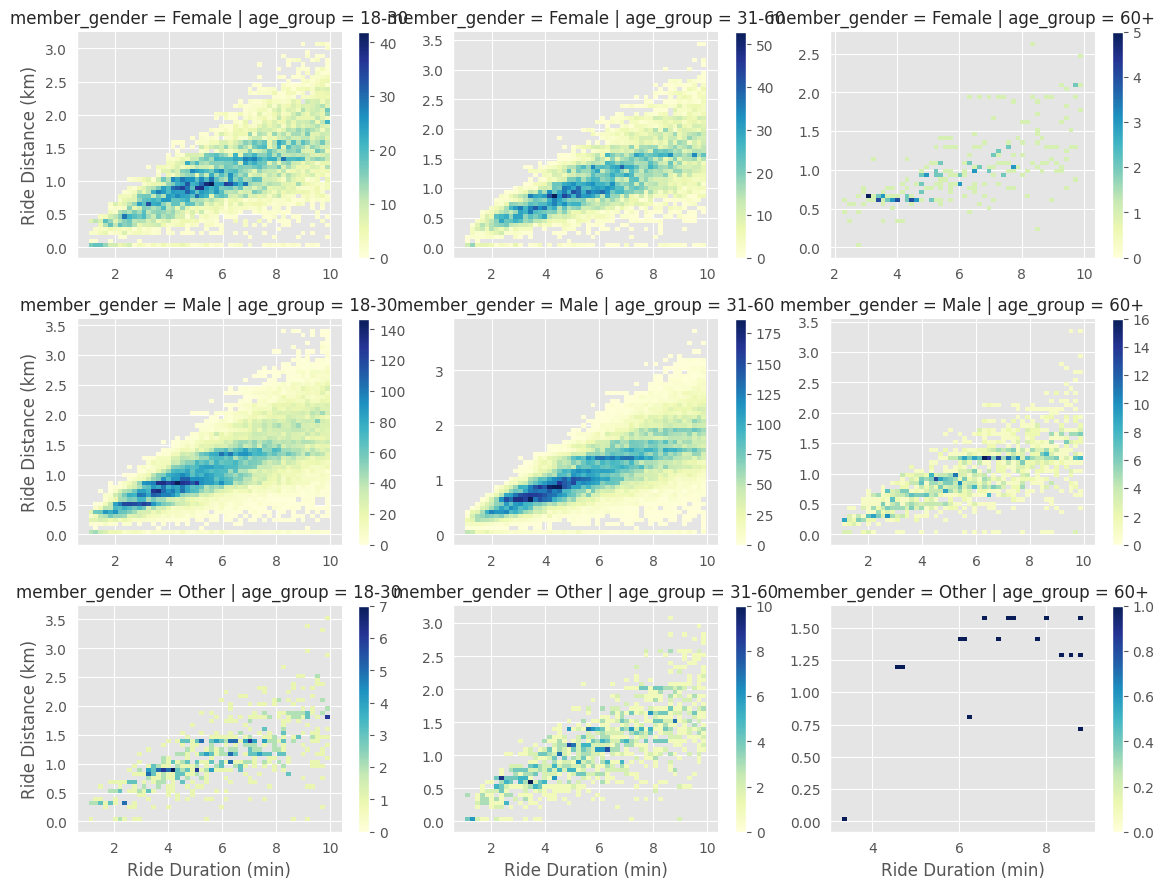

In [91]:
g = sns.FacetGrid(data=member_dd, col='age_group', row='member_gender',
                   height=3, aspect=1.3, sharey=False, sharex=False)
# g.map_dataframe(sns.scatterplot, x='duration_min', y='distance')
# bins_dur = np.arange(0, 50, 1)
# bins_dis = np.arange(-0.1, 10, 0.1)
g.map_dataframe(sns.histplot, x='duration_min', y='distance',
#                 bins = [bins_dur, bins_dis],
                bins=50,
                cmap='YlGnBu', cbar=True)

g.set_xlabels('Ride Duration (min)')
g.set_ylabels('Ride Distance (km)');

#### Observation #12.
> For all the user groups except the 'Other' gender and age 60+ group, there is a positive linear relation for riding distance and duration.

> When users are female or male and in age groups 18 to 30 or 31 to 60, the relation for riding distance and duration are quite clear. There are less rides for users whose gender labeled as 'Other' or users age larger than 60, therefore, for these groups, the linear relation is not as clear as other groups.

#### Question #13. which is the most busiest station at different time of the day and day of the week?

In [92]:
df.hour.describe()

,hour
count,183412.000000
mean,13.458421
std,4.724978
min,0.000000
25%,9.000000
50%,14.000000
75%,17.000000
max,23.000000


In [93]:
# bin edges that will be used to define member age group
bin_edges = [-1, 12, 18, 23]
# labels
bin_names = ['Morning', 'Afternoon', 'Evening']
pd.options.mode.chained_assignment = None  # default='warn'
df['hour_label'] = pd.cut(df['hour'], bin_edges, labels=bin_names)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour,duration_min,distance,member_age,hour_label
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,17,869.75,0.54,35.0,Afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,Thursday,18,708.68,1.74,NaN,Afternoon
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,12,1030.90,2.70,47.0,Morning
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,17,608.17,0.26,30.0,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,23,26.42,2.41,45.0,Evening


In [94]:
station_df = df.groupby(['dow', 'hour_label', 'start_station_name']).size()

<ipython-input-94-d49a1e5a4d48>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_df = df.groupby(['dow', 'hour_label', 'start_station_name']).size()


In [95]:
station_df.unstack(level=[0,1]).loc[start_order,:]

dow                                                 Friday                    \
hour_label                                         Morning Afternoon Evening   
start_station_name                                                             
Market St at 10th St                                   352       282      81   
San Francisco Caltrain Station 2  (Townsend St ...     385       117      56   
Berry St at 4th St                                     305       208      17   
Montgomery St BART Station (Market St at 2nd St)       209       248      48   
Powell St BART Station (Market St at 4th St)           155       210      63   

dow                                                 Monday                    \
hour_label                                         Morning Afternoon Evening   
start_station_name                                                             
Market St at 10th St                                   211       241      78   
San Francisco Caltrain Station 2  (Townsend St ...     356       152      90   
Berry St at 4th St                                     237       202      35   
Montgomery St BART Station (Market St at 2nd St)       163       230      31   
Powell St BART Station (Market St at 4th St)           130       209      71   

dow                                                Saturday                    \
hour_label                                          Morning Afternoon Evening   
start_station_name                                                              
Market St at 10th St                                    129       143      44   
San Francisco Caltrain Station 2  (Townsend St ...       51        40       4   
Berry St at 4th St                                       74        59      10   
Montgomery St BART Station (Market St at 2nd St)         51        54      22   
Powell St BART Station (Market St at 4th St)             80       154      56   

dow                                                 Sunday  ...          \
hour_label                                         Morning  ... Evening   
start_station_name                                          ...           
Market St at 10th St                                   102  ...      31   
San Francisco Caltrain Station 2  (Townsend St ...      20  ...      11   
Berry St at 4th St                                      51  ...      22   
Montgomery St BART Station (Market St at 2nd St)        31  ...      21   
Powell St BART Station (Market St at 4th St)            63  ...      51   

dow                                                Thursday                    \
hour_label                                          Morning Afternoon Evening   
start_station_name                                                              
Market St at 10th St                                    328       335     101   
San Francisco Caltrain Station 2  (Townsend St ...      474       243     105   
Berry St at 4th St                                      287       298      58   
Montgomery St BART Station (Market St at 2nd St)        218       354      78   
Powell St BART Station (Market St at 4th St)            143       239     105   

dow                                                Tuesday                    \
hour_label                                         Morning Afternoon Evening   
start_station_name                                                             
Market St at 10th St                                   309       291      89   
San Francisco Caltrain Station 2  (Townsend St ...     475       193      87   
Berry St at 4th St                                     290       253      46   
Montgomery St BART Station (Market St at 2nd St)       211       307      43   
Powell St BART Station (Market St at 4th St)           166       219      67   

dow                                                Wednesday                    
hour_label                                           Morning Afternoon Evening  
start_station_na

In [96]:
df.groupby(['dow', 'start_station_name']).size().unstack(level=0).loc[start_order,:]

dow,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
start_station_name,,,,,,,
Market St at 10th St,715.0,530.0,316.0,253.0,764.0,689.0,637.0
San Francisco Caltrain Station 2 (Townsend St at 4th St),558.0,598.0,95.0,82.0,822.0,755.0,634.0
Berry St at 4th St,530.0,474.0,143.0,134.0,643.0,589.0,539.0
Montgomery St BART Station (Market St at 2nd St),505.0,424.0,127.0,102.0,650.0,561.0,526.0
Powell St BART Station (Market St at 4th St),428.0,410.0,290.0,262.0,487.0,452.0,431.0


In [97]:
df.groupby(['hour_label', 'start_station_name']).size().unstack(level=0).loc[start_order,:]

<ipython-input-97-d066063399e6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['hour_label', 'start_station_name']).size().unstack(level=0).loc[start_order,:]


hour_label,Morning,Afternoon,Evening
start_station_name,,,
Market St at 10th St,1682,1693,529
San Francisco Caltrain Station 2 (Townsend St at 4th St),2128,972,444
Berry St at 4th St,1478,1326,248
Montgomery St BART Station (Market St at 2nd St),1071,1521,303
Powell St BART Station (Market St at 4th St),873,1390,497


#### Visualization #13. bar plot of no. of rides for top stations

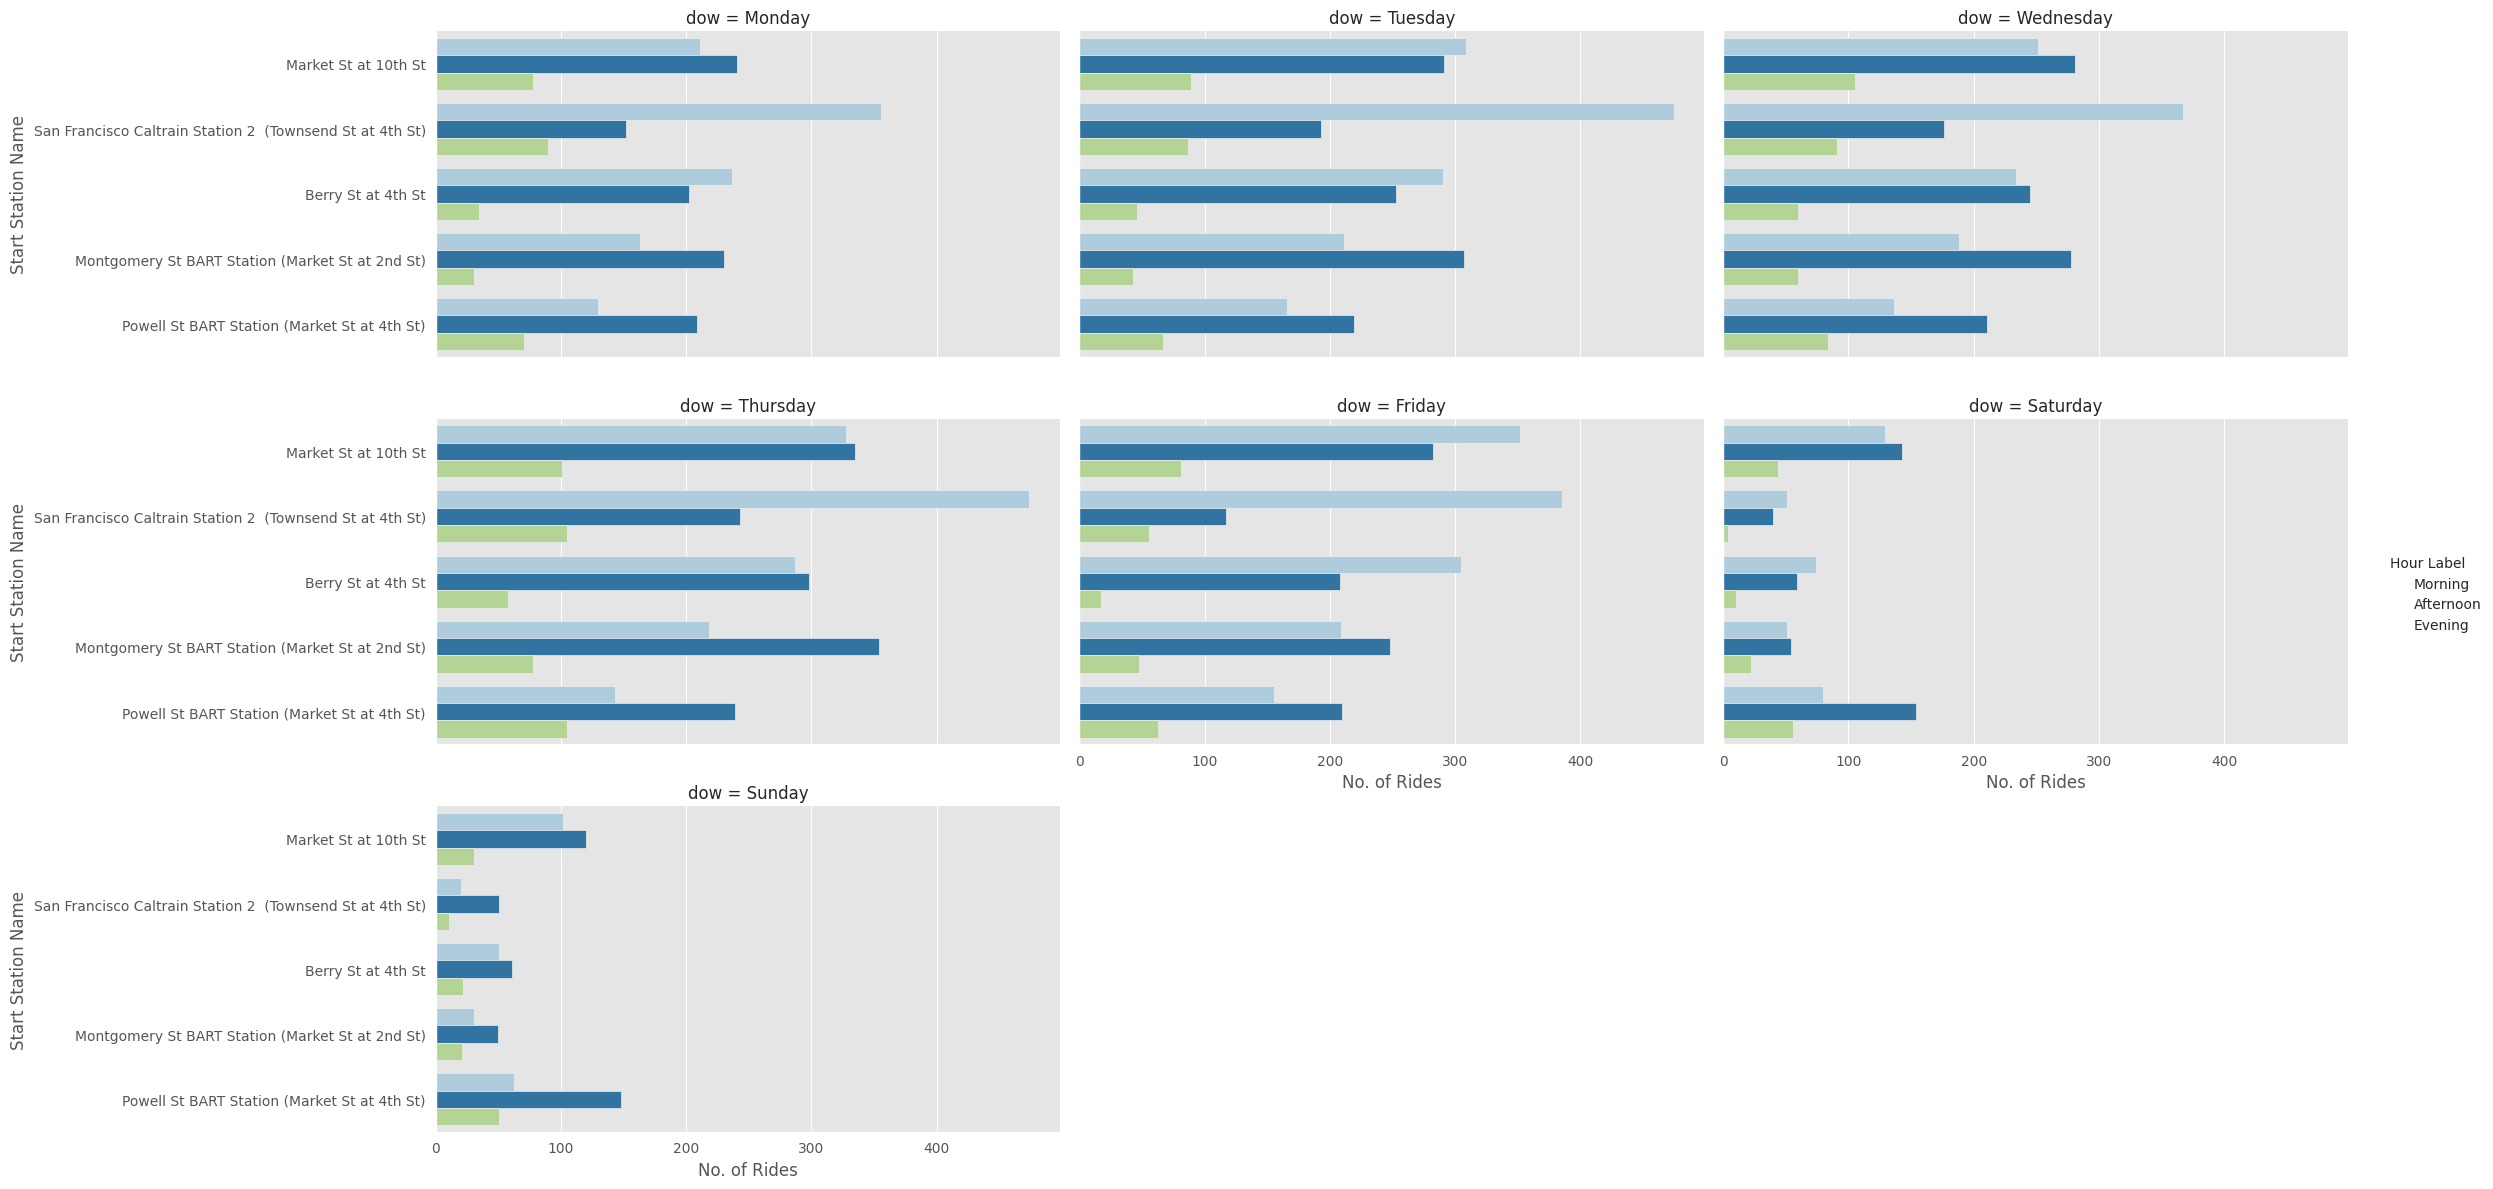

In [98]:
sns.set_palette('Paired')
g = sns.catplot(data=df, y='start_station_name', col='dow', hue='hour_label', kind='count',
                height=4, aspect=2, col_wrap=3, col_order=ordinal_week, order=start_order, legend=False)

g.add_legend(title='Hour Label', label_order=['Morning', 'Afternoon', 'Evening'])
g.set_xlabels('No. of Rides')
g.set_ylabels('Start Station Name');

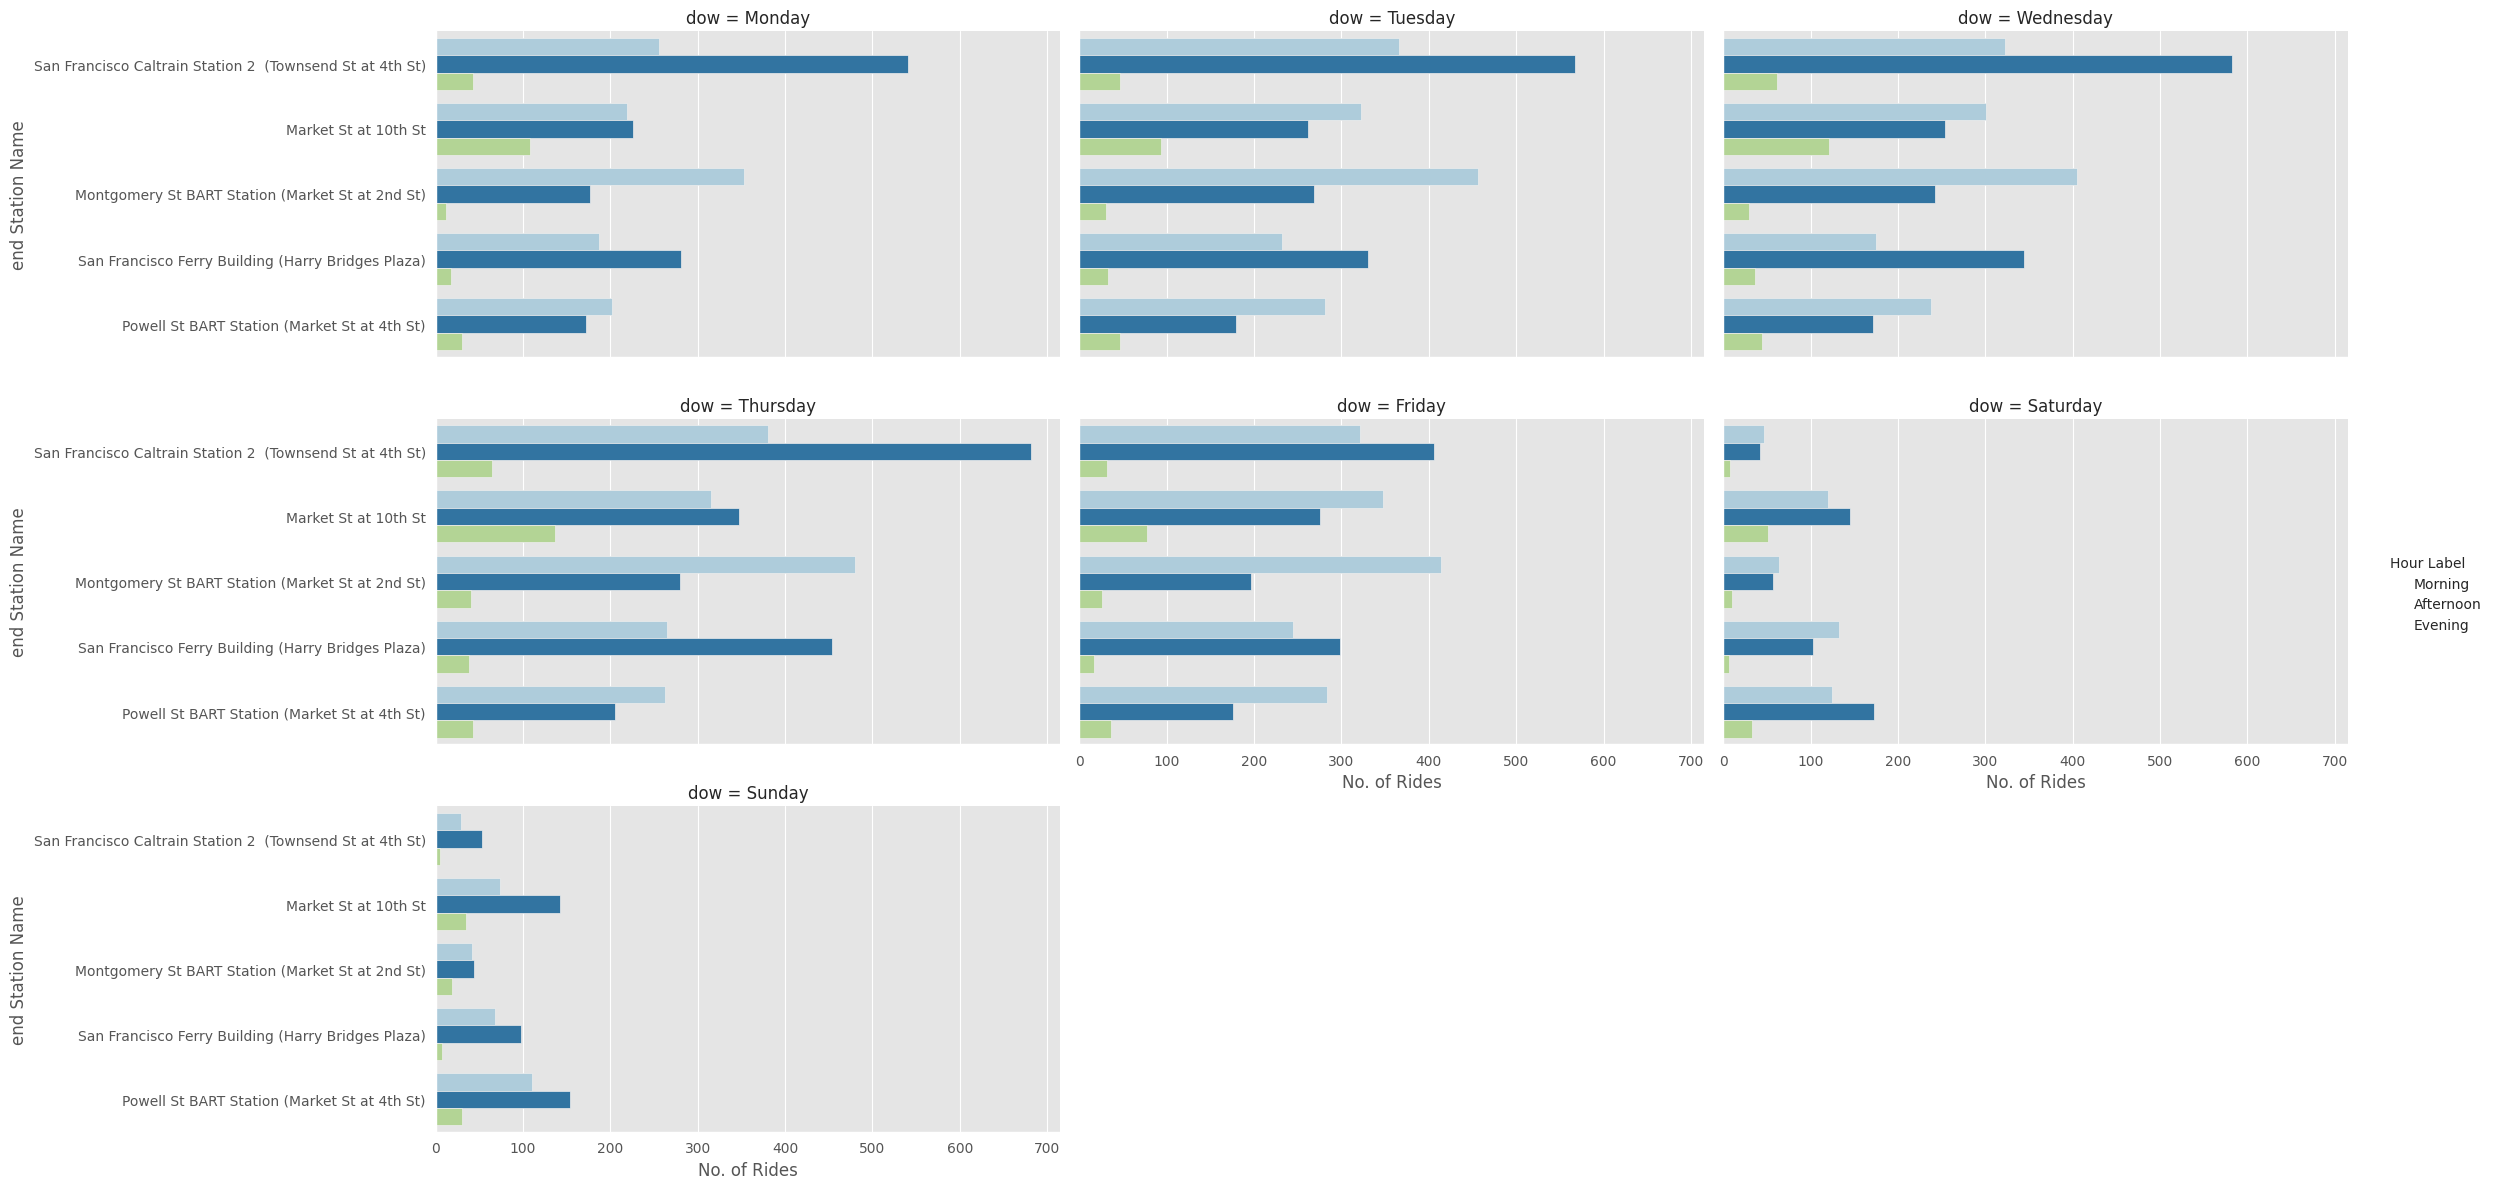

In [99]:
sns.set_palette('Paired')
g = sns.catplot(data=df, y='end_station_name', col='dow', hue='hour_label', kind='count',
                height=4, aspect=2, col_wrap=3, col_order=ordinal_week, order=end_order, legend=False)

g.add_legend(title='Hour Label', label_order=['Morning', 'Afternoon', 'Evening'])
g.set_xlabels('No. of Rides')
g.set_ylabels('end Station Name');

#### Observation #14.
> San Fransisco Caltrain Station 2 is the busiest station during weekdays in the mornings for start station and in the afternoons for end station, the assumption is commuters ride bikes from and to the station as it is close to residential areas.

> Montgomery St BART Station is a popular end station in the mornings during weekdays, therefore we can assume there are office areas near the station.

> For the top 5 busiest start/end stations, Powell St BART Station and Market St at 10th Street are relatively busy during the weekend.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I extended my investigation of the temporal analysis for different user types by adding not only the day of the week, but also hourly distributions. Initially my assumption is subscribers use shared bikes for commuter purpose while the normal customers don't. But with more variables involved, I found out there is also similar patterns of the peak and off-peak hours for normal customers.

> Similarly, after adding the start and end stations with timestamp data, I made more assumptions about the top busiest stations, for instance, San Fransisco Caltrain Station 2 is close to residential areas and Montgomery St BART Station is close to office areas.


### Were there any interesting or surprising interactions between features?

> The positive relation bewtween riding duration and distance is suitable for all kinds of user groups. Member age and gender differences don't play a strong part in terms of riding behaviours.

## Conclusions
<a id='con'> </a>
> 1. The majority of the bike users are subscribers. There is a clear trend of heavy usage during office peak hours from the hourly distribution on weekdays, for both subscribers and normal users. Subsribers use bikes mainly on weekdays for commuting purpose, there are few rides on weekends, while normal customers also use shared bikse during daytime on weekends.
> 2. Almost all the rides are within 50mins and 8km. The member age and gender don't place a huge difference in terms of riding habit. Riding duration and distance have a positive linear relationship, and the correlation coefficient increases when removing outliers by considering shorter distance and duration ranges.
> 3. San Fransisco Caltrain Station 2 and Market St at 10th Street are two most busiest stations. While Market St at 10th is relatively busy throughout the day, San Fransisco Caltrain Station 2 is the busiest station during weekdays in the mornings for start station and in the afternoons for end station, it is considered to be close to residential areas. The other top 5 busiest station Montgomery St BART Station, is considered to be close to office areas.
